In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
df_train.shape

(1460, 81)

In [18]:
# pd.DataFrame(df_train.isnull().sum() / len(df_train)).sort_values(by = 0)

In [4]:
pd.set_option("display.max_columns", 100)

### Check for NaN values, columns that have NaN values

In [5]:
def get_Nan(dataframe):
    total_nans=dataframe.isnull().sum().sum()
    print('Total Number of NaNs:')
    print(total_nans)
    print('-'*80)
    
    percent_nans=(total_nans/(dataframe.shape[0]*dataframe.shape[1]))*100
    print('Percentage of NaNs in total data:')
    print(percent_nans)
    print('-'*80)

    print('Number of NaNs per column')
    #Pre-processing steps
    col_nan=pd.DataFrame(dataframe.isnull().sum())
    col_nan=col_nan.reset_index()
    col_nan=col_nan.rename(columns={'index':'column', 0:'total.Nans'})
    #convert to percentage of NaN's per row
    col_nan['total.Nans']=(col_nan['total.Nans']/len(dataframe))*100
    return (round(col_nan.sort_values(by='total.Nans', ascending=False).loc[(col_nan['total.Nans'])>0],ndigits=2))        
        

get_Nan(df_train)

Total Number of NaNs:
6965
--------------------------------------------------------------------------------
Percentage of NaNs in total data:
5.889565364451209
--------------------------------------------------------------------------------
Number of NaNs per column


,column,total.Nans
72,PoolQC,99.52
74,MiscFeature,96.30
6,Alley,93.77
73,Fence,80.75
57,FireplaceQu,47.26
3,LotFrontage,17.74
59,GarageYrBlt,5.55
64,GarageCond,5.55
58,GarageType,5.55
60,GarageFinish,5.55


### Explore data, compare with previous analysis and see what to do with NaNs in each column

Fill Na of PoolQC with 'NoPool' because in description text Na means that there is no pool

In [6]:
df_train['PoolQC']=df_train['PoolQC'].fillna('NoPool')

Check MiscFeature, in description text Na means there are no extra features so Na will be replaced with 'None'

In [7]:
df_train['MiscFeature']=df_train['MiscFeature'].fillna('None')

Check Alley column, in description text Na means there is no alley access, Na will be replaced with 'NoAccess'

In [8]:
df_train['Alley']=df_train['Alley'].fillna('NoAccess')

Check Fence column, in description text Na means no fence, Na will be replaced with 'NoFence'

In [9]:
df_train['Fence']=df_train['Fence'].fillna('NoFence')

To work with different type of analysis:
 - FireplaceQu
 - LotFrontage
 - GarageYrBlt
 - GarageCond
 - GarageType
 - GarageFinish
 - GarageQual
 - BsmtFinType2
 - BsmtExposure
 - BsmtQual
 - BsmtCond
 - BsmtFinType1
 - MasVnrArea
 - MasVnrType
 - Electrical

In [10]:
get_Nan(df_train)

Total Number of NaNs:
1558
--------------------------------------------------------------------------------
Percentage of NaNs in total data:
1.317436157618806
--------------------------------------------------------------------------------
Number of NaNs per column


,column,total.Nans
57,FireplaceQu,47.26
3,LotFrontage,17.74
60,GarageFinish,5.55
64,GarageCond,5.55
59,GarageYrBlt,5.55
63,GarageQual,5.55
58,GarageType,5.55
35,BsmtFinType2,2.60
32,BsmtExposure,2.60
30,BsmtQual,2.53


In [99]:
df_train.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

### Adding new features: HouseAge, OutdoorArea and TotalBath

In [100]:
df_train['HouseAge'] = df_train.YrSold - df_train.YearRemodAdd
df_train['OutdoorArea'] = df_train.PoolArea + df_train.WoodDeckSF + df_train.OpenPorchSF + df_train.ScreenPorch + df_train['3SsnPorch'] + df_train.EnclosedPorch
df_train['TotalBath'] = df_train.FullBath + df_train.BsmtFullBath

### Creating LotShapeBin, PoolBin and FireplacesBin as binary variables for existing features

In [46]:
df_train['LotShapeBin'] = ['Reg' if x == 'Reg' else 'IR' for x in df_train.LotShape]
df_train['PoolBin'] = ['No' if x == 'NoPool' else 'Yes' for x in df_train.PoolQC]
df_train['FireplacesBin'] = ['No' if x == 0 else 'Yes' for x in df_train.Fireplaces]

In [102]:
df_train.HouseAge.describe()

count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: HouseAge, dtype: float64

In [105]:
df_train[df_train.HouseAge < 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,OutdoorArea,TotalBath,LotShape2,LotShapeBin,PoolBin,FireplacesBin
523,524,60,RL,130.0,40094,Pave,NoAccess,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NoPool,NoFence,None,0,10,2007,New,Partial,184750,-1,614,4,IR,IR,No,Yes


In [87]:
def boxplot(features_list, response = 'SalePrice'):
    
    for elem in features_list:

        my_order = df_train.groupby(by=[elem])[response].median().sort_values(ascending=False).iloc[::-1].index

        nobs = df_train[elem].value_counts().reindex(my_order).values
        nobs = [str(x) for x in nobs.tolist()]
        nobs = ["n: " + i for i in nobs]
                
        plt.figure(figsize = (12,6))
        sns.set(style="ticks", color_codes=True)
        ax = sns.boxplot(df_train[elem], df_train[response],
                         color = [0.7622812227381776, 0.8406850963511671, 0.6846482959871109], showmeans = True,
                         meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"darkgreen"},
                         order = my_order)
        plt.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.2, axis = "y")
        
        pos = range(len(nobs))
        for tick,label in zip(pos,ax.get_xticklabels()):
            ax.text(pos[tick], -1, nobs[tick],
            horizontalalignment='center', size='x-small', color='dimgrey', weight='semibold')
        
        plt.show()
        

def scatterplot(features_list, response = 'SalePrice'):
    
    for elem in features_list:
        plt.figure(figsize = (12,6))
        sns.set(style="ticks", color_codes=True)
        sns.regplot(df_train[response], df_train[elem],
                    color = [0.7622812227381776, 0.8406850963511671, 0.6846482959871109],
                    line_kws={"color":"darkgreen","alpha":0.7,"lw":3})
        plt.grid(b = True, which = 'major', color = '#999999', linestyle = '--', alpha = 0.2, axis = "y")
        plt.show()

### Define plotting functions that use variables as responses

In [96]:
def boxplot2(response_list, feature = 'HouseAge'):
    
    for elem in response_list:

        #my_order = df_train.groupby(by = [feature])[elem].median().sort_values(ascending = False).iloc[::-1].index

        nobs = df_train[feature].value_counts()
        nobs = [str(x) for x in nobs.tolist()]
        nobs = ["n: " + i for i in nobs]
                
        plt.figure(figsize = (12,6))
        sns.set(style="ticks", color_codes=True)
        ax = sns.boxplot(df_train[feature], df_train[elem],
                         color = [0.7622812227381776, 0.8406850963511671, 0.6846482959871109], showmeans = True,
                         meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"darkgreen"})#,
                        #order = my_order)
        plt.grid(b=True, which='major', color='#999999', linestyle='--', alpha=0.2, axis = "y")
        
        pos = range(len(nobs))
        for tick,label in zip(pos,ax.get_xticklabels()):
            ax.text(pos[tick], -1.5, nobs[tick],
            horizontalalignment='center', size='x-small', color='dimgrey', weight='semibold')
        
        plt.show()

In [82]:
list_cat = ('Neighborhood',
'LandContour',
'Alley',
'HeatingQC',
'MSSubClass',
'MSZoning',
'OverallQual',
'FireplaceQu',
'MasVnrType',
'ExterQual',
'KitchenQual',
'FireplacesBin',
'LotShapeBin',
'PoolBin',
'TotalBath')

list_con = (#'HouseAge',
'GrLivArea',
'LotArea',
'GarageArea',
'TotalBsmtSF',
'OutdoorArea')

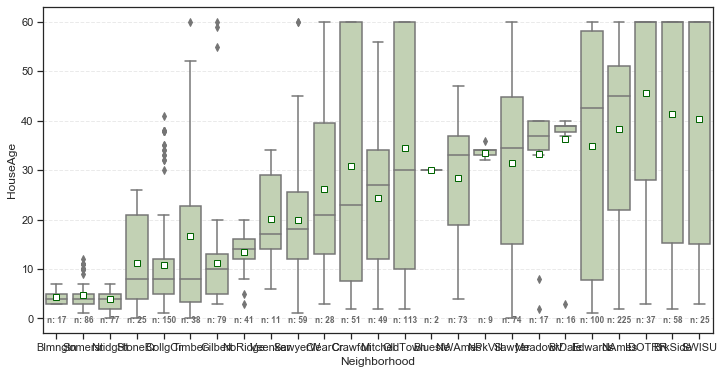

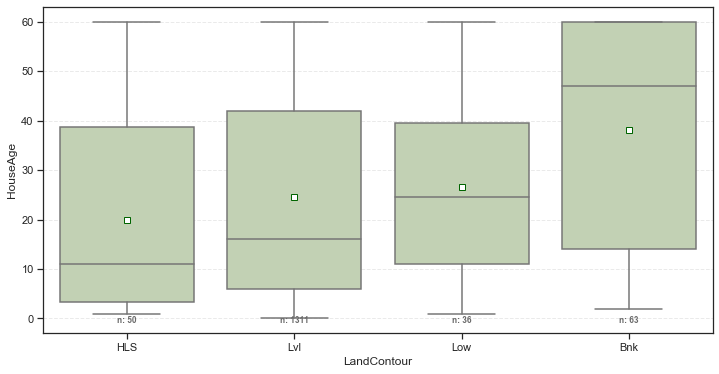

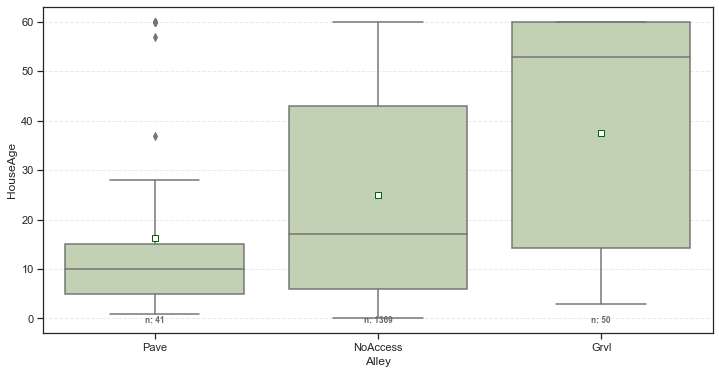

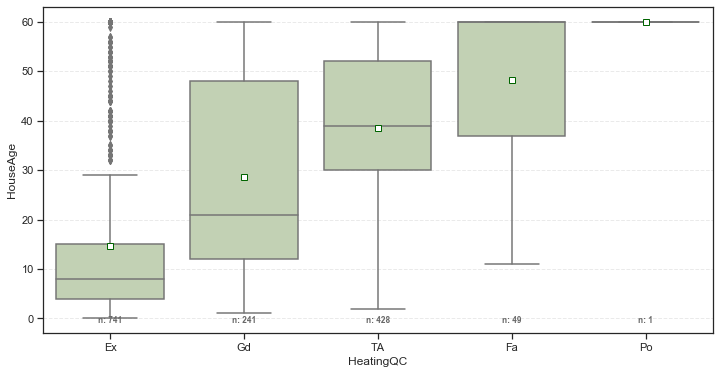

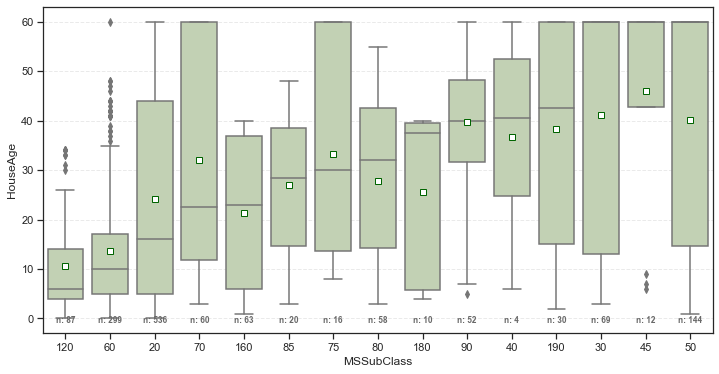

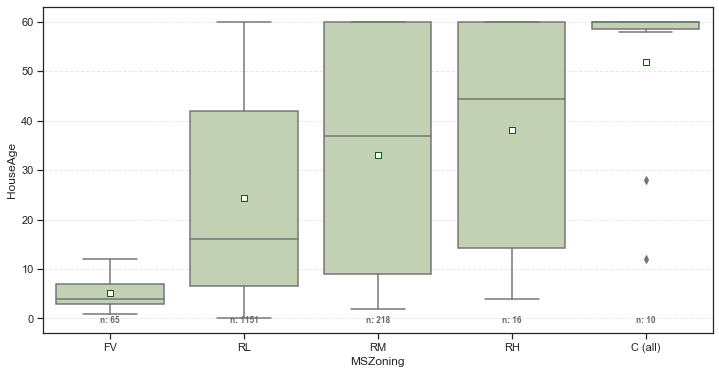

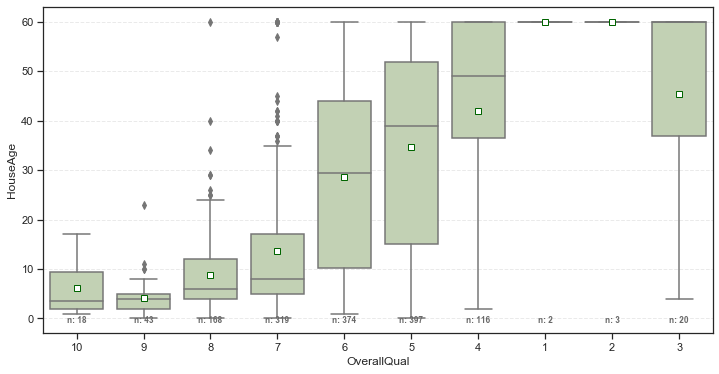

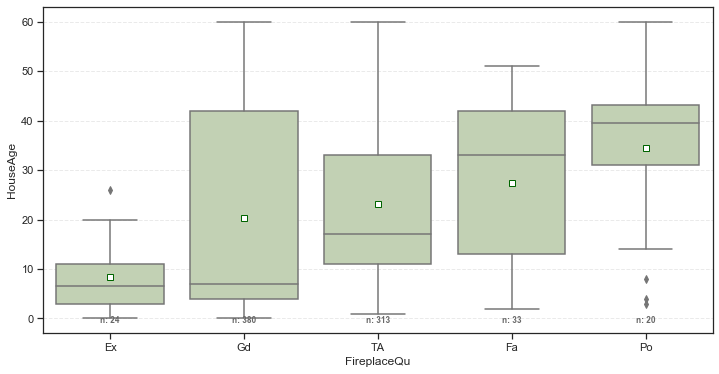

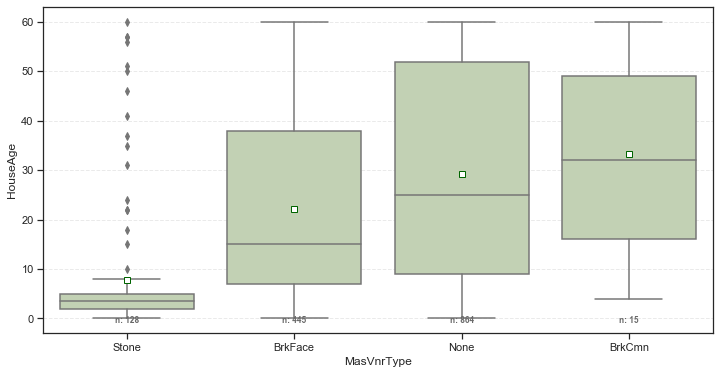

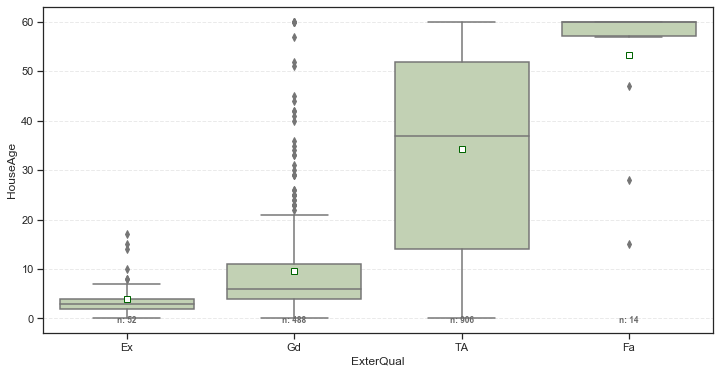

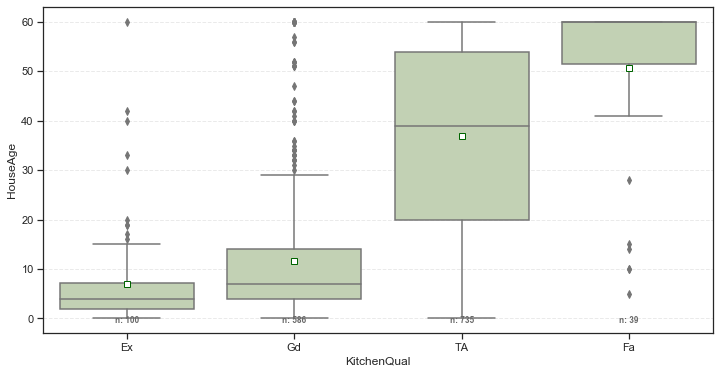

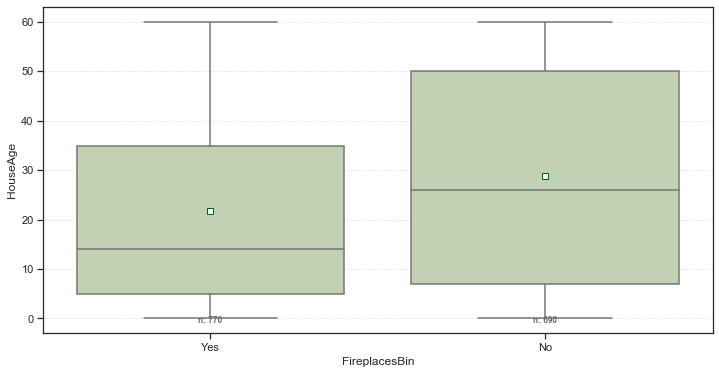

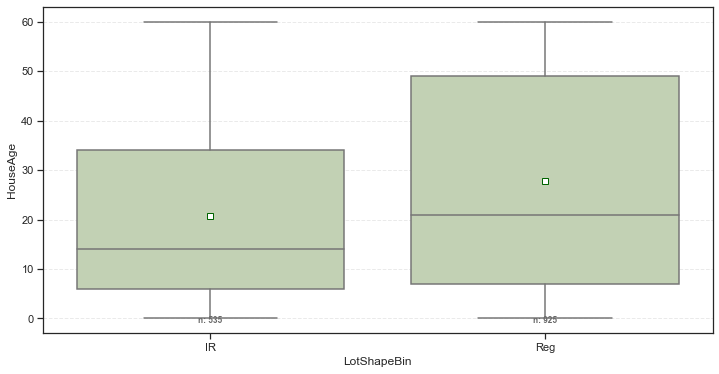

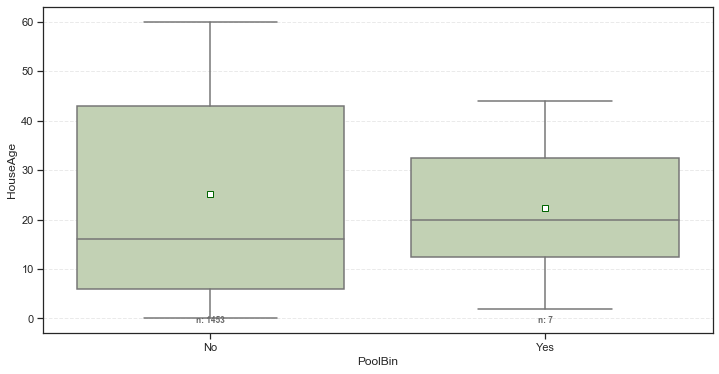

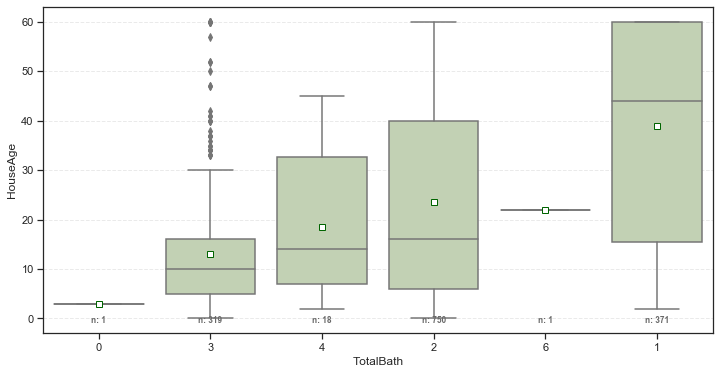

In [88]:
boxplot(list_cat, 'HouseAge')

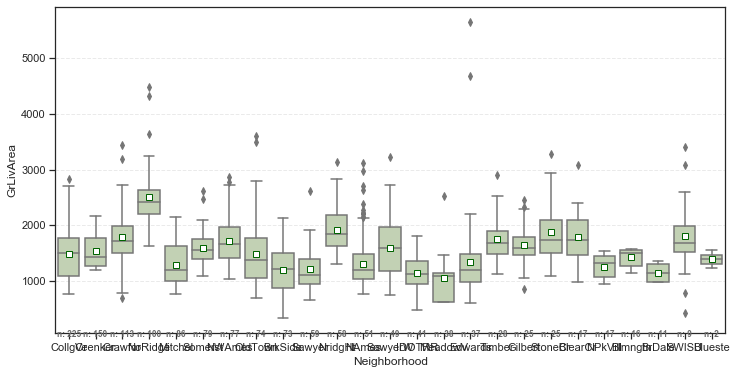

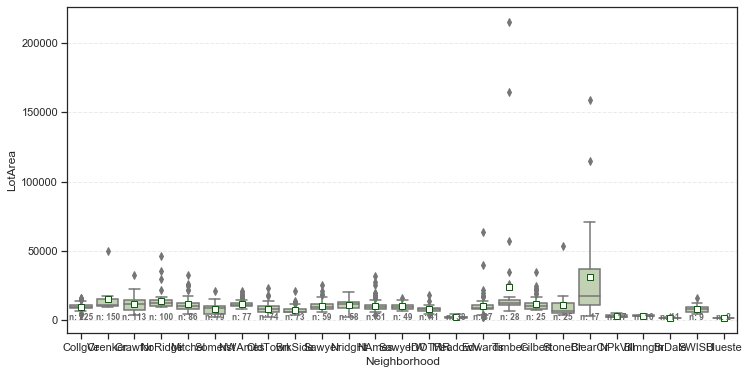

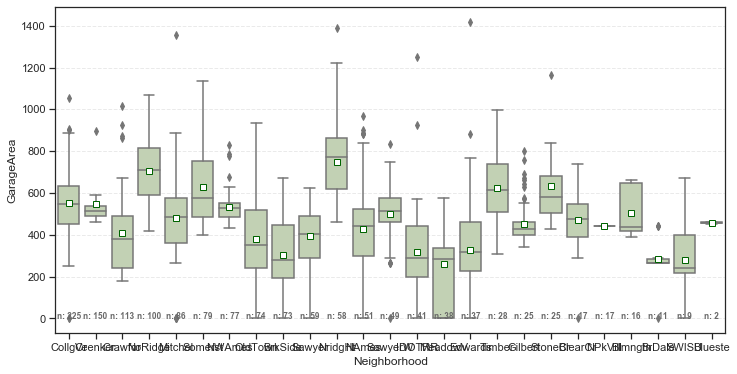

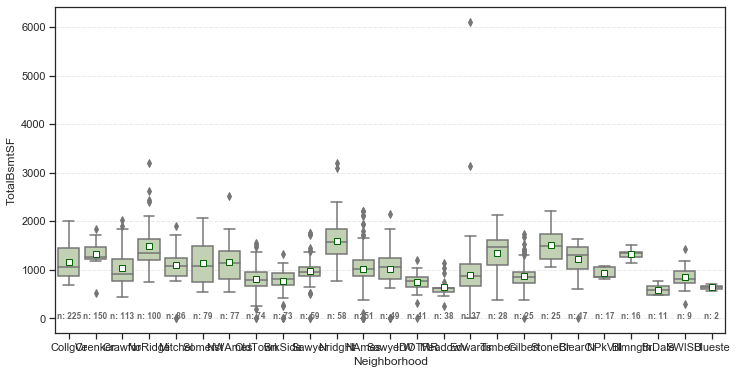

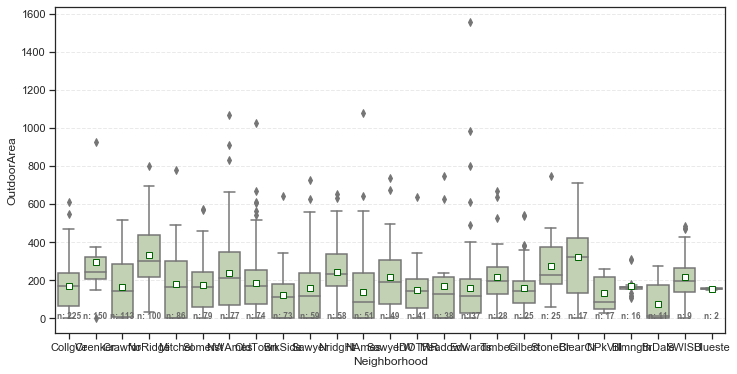

In [98]:
boxplot2(list_con, 'Neighborhood')